# Invasion Percolation

A simple model of fluid forcing its way through a fractured medium (e.g., pollutants through rock).

1.  Fill NxN grid of cells with random integers in range 1..R.
2.  Mark center cell as "filled".
3.  Repeatedly:
    1.  Find lowest-valued neighbors on edge of filled region.
    2.  Select one of those neighbors at random.
    3.  Fill it.
4.  Until filled region reaches boundary of grid.

How to implement in code?

In [2]:
import numpy as np
import random

In [3]:
def percolation(size, spread):
    """
    Simulate invasion percolation on a size x size grid with values in [1..spread],
    reporting density of final filled shape.
    """
    
    grid = make_grid(size, spread)
    chosen = (int(size/2), int(size/2))
    fill(grid, chosen)
    while not on_boundary(grid, chosen):
        chosen = choose_next(grid)
        fill(grid, chosen)
    return grid, calculate_density(grid)

In [4]:
def make_grid(size, spread):
    """
    Create size x size grid filled with values in [1..spread].
    """
    return np.random.randint(low=1, high=spread+1, size=(size, size))

In [5]:
def fill(grid, loc):
    """
    Mark a cell as filled.
    """
    grid[loc] = 0

In [6]:
def on_boundary(grid, loc):
    """
    Is the specified cell on the boundary of the grid?
    """
    grid_x, grid_y = grid.shape
    loc_x, loc_y = loc
    return (loc_x == 0) or (loc_y == 0) or (loc_x == (grid_x -1)) or (loc_y == (grid_y -1))

In [7]:
def calculate_density(grid):
    """
    Return proportion of cells that are filled.
    """
    filled = np.sum(grid == 0)
    return filled / grid.size

In [8]:
def choose_next(grid):
    """
    Find and return coordinates of next grid cell to fill.
    """
    candidates = []
    value = 1 + grid.max()
    dim_x, dim_y = grid.shape
    for x in range(dim_x):
        for y in range(dim_y):
            if grid[x, y] == 0:
                pass
            elif is_adjacent(grid, (x, y)):
                if grid[x, y] < value:
                    value = grid[x, y]
                    candidates = [(x, y)]
                elif grid[x, y] == value:
                    candidates.append((x, y))
    return random.choice(candidates)

In [9]:
def is_adjacent(grid, loc):
    """
    Is the location (x, y) adjacent to a filled cell?
    """
    x, y = loc
    max_x, max_y = grid.shape
    if (x > 0) and (grid[x-1, y] == 0):
        return True
    if (y > 0) and (grid[x, y-1] == 0):
        return True
    if (x < max_x-1) and (grid[x+1, y] == 0):
        return True
    if (y < max_y-1) and (grid[x, y+1] == 0):
        return True
    return False

In [10]:
grid, density = percolation(5, 5)
print(grid)
print(density)

[[1 4 5 5 5]
 [0 0 0 5 5]
 [3 5 0 0 4]
 [4 5 4 3 1]
 [4 4 1 3 4]]
0.2


In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

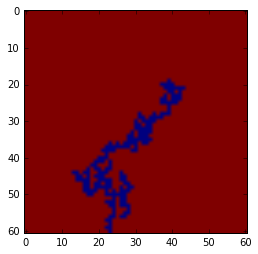

In [20]:
grid, density = percolation(61, 20)
grid[grid>0] = 1
plt.imshow(grid)